In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv("dataset/dataset.csv")

In [3]:
df

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P12,P13,P14,P15,P16,P17,P18,P19,P20,Major
0,4,5,4,5,5,4,3,3,4,5,...,4,5,4,2,4,5,3,4,2,ComputerScience
1,4,3,3,3,4,3,2,2,3,4,...,3,4,3,1,3,4,2,3,1,ComputerScience
2,5,5,5,5,4,5,4,3,5,5,...,5,5,4,2,5,5,4,5,2,ComputerScience
3,3,4,3,4,3,4,2,2,3,4,...,3,4,3,1,3,4,2,3,1,ComputerScience
4,4,5,4,5,5,4,3,3,4,5,...,4,5,4,2,4,5,3,4,2,ComputerScience
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6034,2,4,2,5,1,5,4,4,5,1,...,5,5,1,4,5,5,5,1,4,Nursing
6035,3,3,3,4,2,3,4,4,4,3,...,4,4,2,3,4,4,4,2,3,Nursing
6036,2,4,3,5,1,5,4,4,5,1,...,5,5,1,4,5,5,5,1,4,Nursing
6037,1,3,4,4,2,3,4,4,4,3,...,4,4,2,3,4,4,4,2,3,Nursing


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6039 entries, 0 to 6038
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   P1      6039 non-null   int64 
 1   P2      6039 non-null   int64 
 2   P3      6039 non-null   int64 
 3   P4      6039 non-null   int64 
 4   P5      6039 non-null   int64 
 5   P6      6039 non-null   int64 
 6   P7      6039 non-null   int64 
 7   P8      6039 non-null   int64 
 8   P9      6039 non-null   int64 
 9   P10     6039 non-null   int64 
 10  P11     6039 non-null   int64 
 11  P12     6039 non-null   int64 
 12  P13     6039 non-null   int64 
 13  P14     6039 non-null   int64 
 14  P15     6039 non-null   int64 
 15  P16     6039 non-null   int64 
 16  P17     6039 non-null   int64 
 17  P18     6039 non-null   int64 
 18  P19     6039 non-null   int64 
 19  P20     6039 non-null   int64 
 20  Major   6039 non-null   object
dtypes: int64(20), object(1)
memory usage: 990.9+ KB


In [5]:
df.isnull().sum()

P1       0
P2       0
P3       0
P4       0
P5       0
P6       0
P7       0
P8       0
P9       0
P10      0
P11      0
P12      0
P13      0
P14      0
P15      0
P16      0
P17      0
P18      0
P19      0
P20      0
Major    0
dtype: int64

In [6]:
df['Major'].unique()

array(['ComputerScience', 'Engineering', 'Sociology', 'Public Relations',
       'Psychology', 'Political Science', 'Physics', 'Pharmacy',
       'Mathematics', 'Criminology', 'Journalism', 'History', 'Geography',
       'English Literature', 'Ecology', 'Economics', 'Design',
       'Chemistry', 'Biology', 'Architecture', 'Anthropology', 'Nursing'],
      dtype=object)

In [7]:
X = df.iloc[:,0:20]
y = df['Major']

In [8]:
X

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20
0,4,5,4,5,5,4,3,3,4,5,3,4,5,4,2,4,5,3,4,2
1,4,3,3,3,4,3,2,2,3,4,2,3,4,3,1,3,4,2,3,1
2,5,5,5,5,4,5,4,3,5,5,4,5,5,4,2,5,5,4,5,2
3,3,4,3,4,3,4,2,2,3,4,2,3,4,3,1,3,4,2,3,1
4,4,5,4,5,5,4,3,3,4,5,3,4,5,4,2,4,5,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6034,2,4,2,5,1,5,4,4,5,1,4,5,5,1,4,5,5,5,1,4
6035,3,3,3,4,2,3,4,4,4,3,4,4,4,2,3,4,4,4,2,3
6036,2,4,3,5,1,5,4,4,5,1,4,5,5,1,4,5,5,5,1,4
6037,1,3,4,4,2,3,4,4,4,3,4,4,4,2,3,4,4,4,2,3


In [12]:
y

0       ComputerScience
1       ComputerScience
2       ComputerScience
3       ComputerScience
4       ComputerScience
             ...       
6034            Nursing
6035            Nursing
6036            Nursing
6037            Nursing
6038            Nursing
Name: Major, Length: 6039, dtype: object

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=46)

# Decission Tree

In [16]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train.values, y_train.values)
y_pred = clf.predict(X_test)

d:\github\capstone_project\.env\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [17]:
print("akurasi:" ,metrics.accuracy_score(y_test, y_pred))

akurasi: 0.8532008830022075


In [18]:
y_pred = clf.predict([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [19]:
y_pred

array(['Chemistry'], dtype=object)

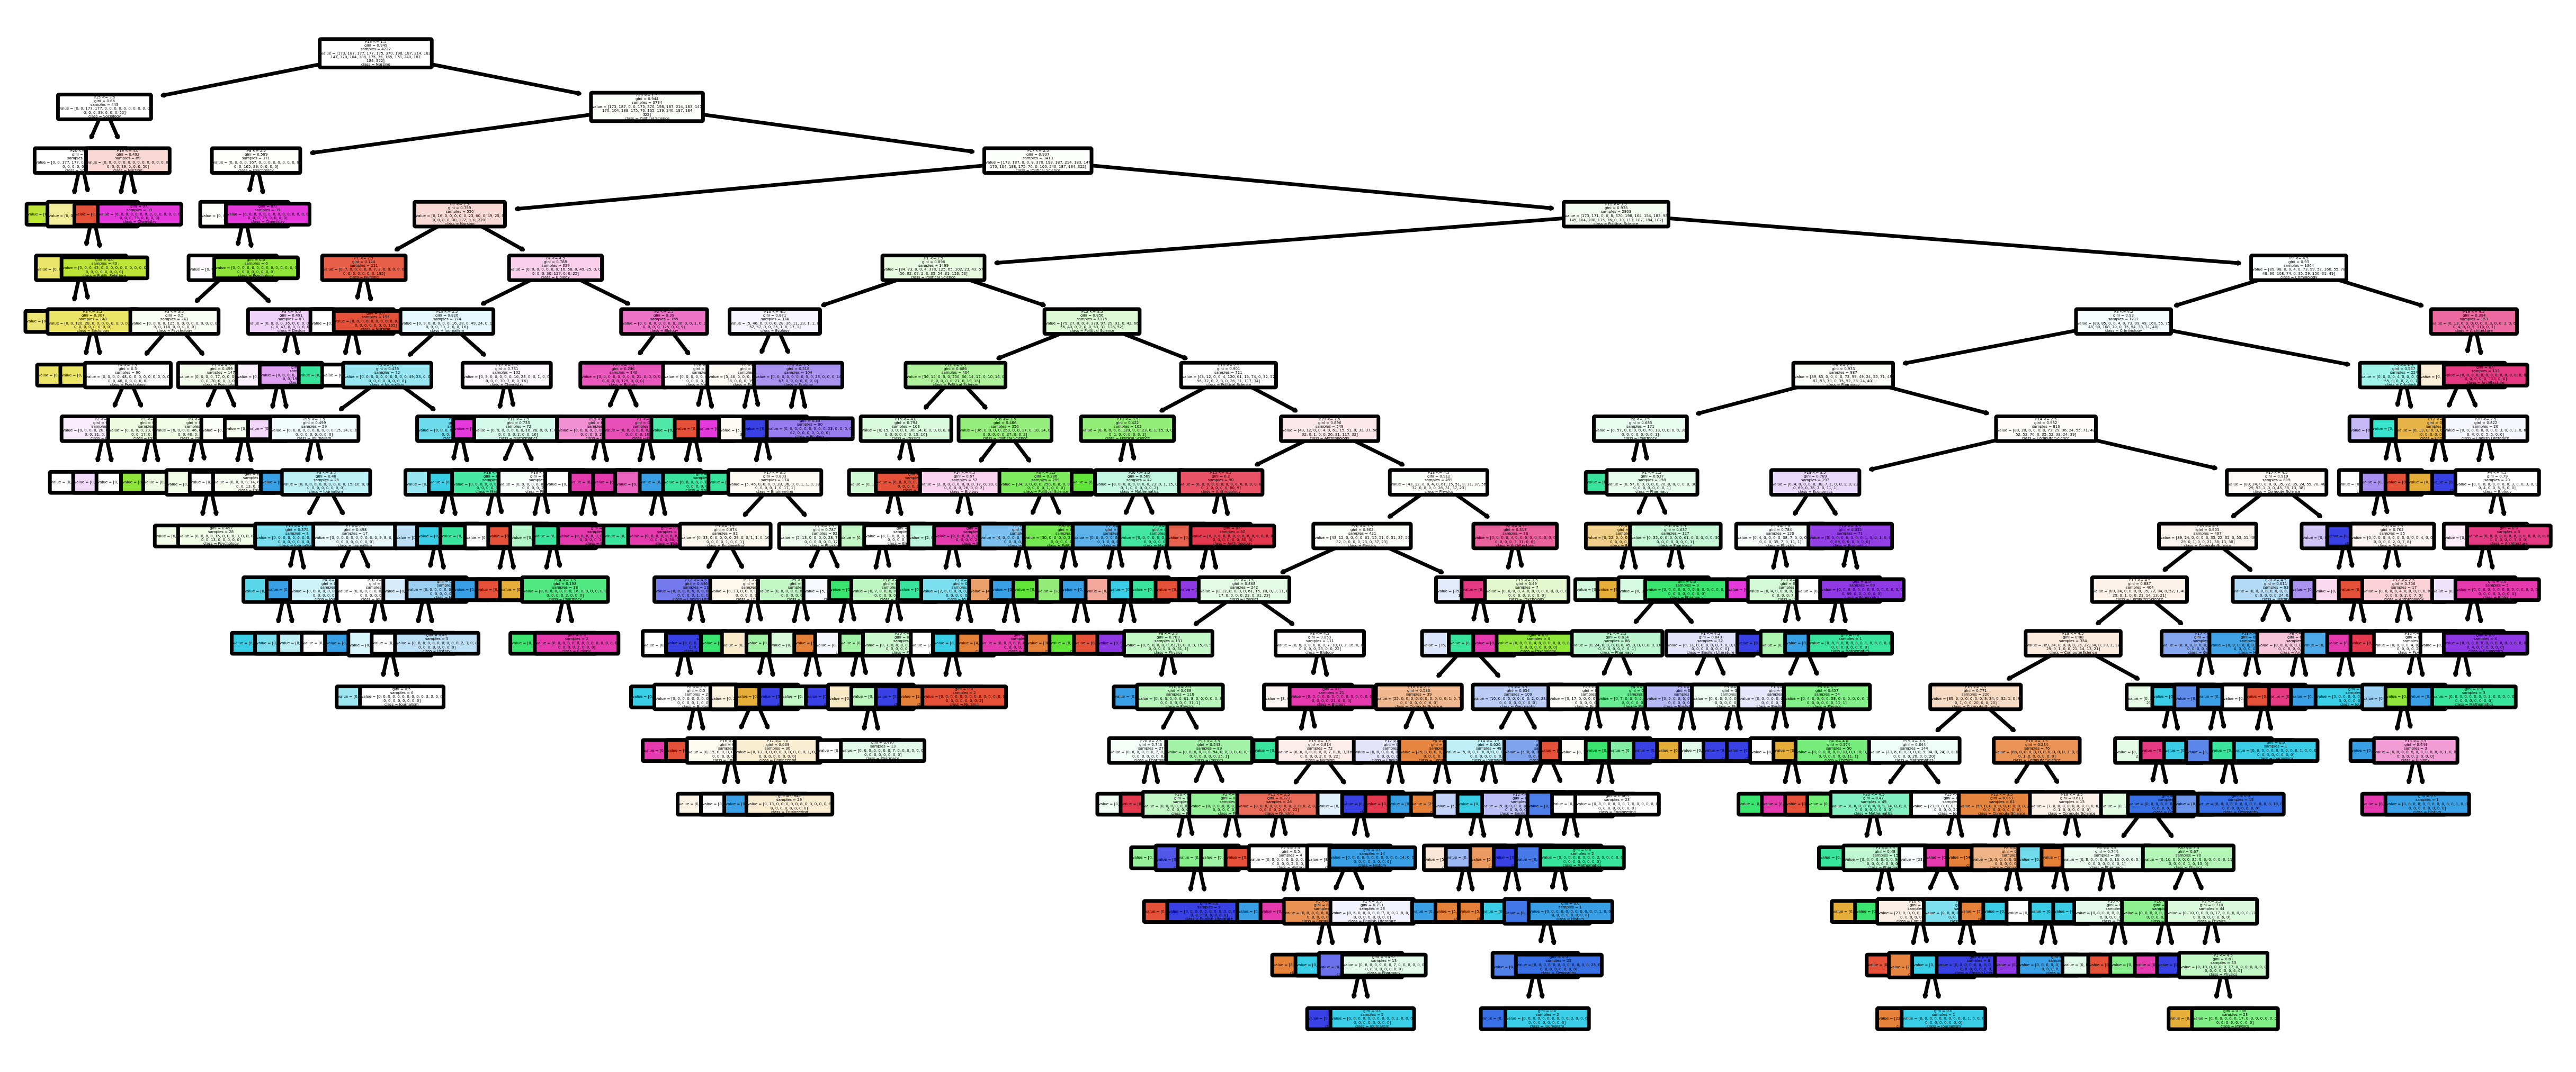

In [21]:
from sklearn import tree
import matplotlib.pyplot as plt


features_cols = ['P1', 'P2', 'P3', 'P4', 'P5','P6', 'P7', 'P8', 'P9', 'P10','P11', 'P12', 'P13', 'P14', 'P15','P16', 'P17', 'P18', 'P19', 'P20']
plt.figure(figsize=(12,5), dpi=500)
tree.plot_tree(clf,
               feature_names=features_cols,
               class_names=['ComputerScience', 'Engineering', 'Sociology', 'Public Relations',
       'Psychology', 'Political Science', 'Physics', 'Pharmacy',
       'Mathematics', 'Criminology', 'Journalism', 'History', 'Geography',
       'English Literature', 'Ecology', 'Economics', 'Design',
       'Chemistry', 'Biology', 'Architecture', 'Anthropology', 'Nursing'],
               filled=True,
               rounded=True
               );


In [22]:
import tensorflow as tf

print(tf.__version__)

2.12.0


In [26]:
import pickle

with open('Model/model.pkl', 'wb') as model_file:
    pickle.dump(clf, model_file)

In [32]:
# import sklearn.external.joblib as extjoblib
import joblib

classifer = joblib.load("Model/model.pkl")

In [33]:
y_pred = classifer.predict([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [34]:
y_pred

array(['Chemistry'], dtype=object)